In [2]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Username,Major,Specialization,Department,User Profile Link,Term & Year,UG College,University Name,Program,Research Exp,...,greV,greQ,greA,gmatA,gmatQ,gmatV,Topper CGPA,CGPA,CGPA Scale,Admission
0,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
1,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,University of Southern California,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
2,ninny.rgs,Electrical Engineering,NaN,Electrical Engineering,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2011,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,430.0,740.0,4.5,NaN,NaN,NaN,72.27,72.27,100.0,1
3,aashishg11,Electrical Engineering,Automation,Instrumentation,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,...,144.0,157.0,3.0,NaN,NaN,NaN,73.00,56.11,100.0,0
4,prnk_us,Computer Science,Security,IT,http://www.edulix.com/unisearch/user.php?uid=1...,Fall - 2013,A D Patel Institute Of Technology,Arizona State University,MS,0,...,149.0,157.0,3.0,NaN,NaN,NaN,8.50,7.71,10.0,1


In [4]:
df.shape

(53643, 26)

In [5]:
print(df.columns)

Index(['Username', 'Major', 'Specialization', 'Department',
       'User Profile Link', 'Term & Year', 'UG College', 'University Name',
       'Program', 'Research Exp', 'Industry Exp', 'Intern Exp', 'Journal Pubs',
       'ConfPubs', 'TOEFL Score', 'TOEFL Essay', 'greV', 'greQ', 'greA',
       'gmatA', 'gmatQ', 'gmatV', 'Topper CGPA', 'CGPA', 'CGPA Scale',
       'Admission'],
      dtype='object')


In [6]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

Username                 0
Major                  387
Specialization       21695
Department               9
User Profile Link        0
Term & Year            322
UG College            2319
University Name          0
Program                322
Research Exp             0
Industry Exp             0
Intern Exp              14
Journal Pubs           336
ConfPubs               336
TOEFL Score           4414
TOEFL Essay          41769
greV                  1256
greQ                  1220
greA                  2858
gmatA                53490
gmatQ                53500
gmatV                53529
Topper CGPA              0
CGPA                    20
CGPA Scale              20
Admission                0
dtype: int64

- **GRE (Graduate Record Examination):**
  - **greV:** Verbal section of the GRE exam.
  - **greQ:** Quantitative (math) section of the GRE exam.
  - **greA:** Analytical writing section of the GRE exam.

- **GMAT (Graduate Management Admission Test):**
  - **gmatA:** Analytical writing assessment section of the GMAT exam.
  - **gmatQ:** Quantitative section of the GMAT exam.
  - **gmatV:** Verbal section of the GMAT exam.

- **Topper CGPA:**
  - Cumulative Grade Point Average (CGPA) achieved by the top performer.

- **CGPA (Cumulative Grade Point Average):**
  - Average of grade points obtained in all subjects over a certain period.

- **CGPA Scale:**
  - Scale or range on which the CGPA is measured.

In [7]:
unique_values_counts = {}
for column in df.columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()
    unique_values_counts[column] = {'unique_values': unique_values, 'value_counts': value_counts}
    
for column, values_counts_dict in unique_values_counts.items():
    print(f"\nColumn: {column}")
    print("Unique Values:", values_counts_dict['unique_values'])
    print("Value Counts:")
    print(values_counts_dict['value_counts'])


Column: Username
Unique Values: ['ninny.rgs' 'aashishg11' 'prnk_us' ... '7790ashish' 'mayureshp'
 'ameed.haikal']
Value Counts:
Username
shah.abid         18
pulkitsachdeva    17
medhavi1607       17
venkatsubbu44     17
joemanley2011     16
                  ..
vinay1187          1
MADHUDARL          1
PacificLemur       1
seemairani         1
ameed.haikal       1
Name: count, Length: 14797, dtype: int64

Column: Major
Unique Values: ['Electrical Engineering' 'Computer Science' 'MIS' 'Computer Engineering'
 'Electronics and Communication' 'Engineering Management'
 'Management Information System' 'Industrial Engineering'
 'Aerospace Engineering' 'mba' 'software engineering'
 'Mechanical Engineering' 'Civil Engineering'
 'Electrical Engineering and Computer Science' 'Industrial Engg/Robotics'
 '(MIS / MSIM / MSIS / MSIT)' 'Automotive Engineering' 'Microbiology'
 'EE / CS' 'Telecommunication' 'Electronics and electrical engineering'
 'Electrical Engg/ comp engg' 'Bioinformatics'
 'Human

In [8]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

Username                 0
Major                  387
Specialization       21695
Department               9
User Profile Link        0
Term & Year            322
UG College            2319
University Name          0
Program                322
Research Exp             0
Industry Exp             0
Intern Exp              14
Journal Pubs           336
ConfPubs               336
TOEFL Score           4414
TOEFL Essay          41769
greV                  1256
greQ                  1220
greA                  2858
gmatA                53490
gmatQ                53500
gmatV                53529
Topper CGPA              0
CGPA                    20
CGPA Scale              20
Admission                0
dtype: int64

Upon initial inspection of the dataset, it was observed that several columns exhibit a considerable number of null values. Specifically:
 with gmatA,gmatQ,gmatV,TOEFL Essay over 85% samples had missing values 
Due to the significant presence of null values in these columns, it is recommended to consider removing them from the dataset to ensure data quality and analysis accuracy.

Username and User Profile Link were irrelevant for the purpose of this study.

Specialization, Major,Department and Term & Year were too imbalanced with multiple variants of the same value.



In [9]:
columns_to_remove = ['Username','User Profile Link','Term & Year','Specialization', 'Major', 'Department', 'User Profile Link','gmatA','gmatV','gmatQ','TOEFL Essay','Industry Exp', 'Intern Exp', 'Journal Pubs', 'ConfPubs']

df = df.drop(columns=columns_to_remove)

df.columns

Index(['UG College', 'University Name', 'Program', 'Research Exp',
       'TOEFL Score', 'greV', 'greQ', 'greA', 'Topper CGPA', 'CGPA',
       'CGPA Scale', 'Admission'],
      dtype='object')

In [10]:
df.head()

,UG College,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission
0,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,101.0,430.0,740.0,4.5,72.27,72.27,100.0,1
1,A C Patil College of Engineering,University of Southern California,MS,0,101.0,430.0,740.0,4.5,72.27,72.27,100.0,1
2,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,101.0,430.0,740.0,4.5,72.27,72.27,100.0,1
3,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,91.0,144.0,157.0,3.0,73.00,56.11,100.0,0
4,A D Patel Institute Of Technology,Arizona State University,MS,0,NaN,149.0,157.0,3.0,8.50,7.71,10.0,1


In [11]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

UG College         2319
University Name       0
Program             322
Research Exp          0
TOEFL Score        4414
greV               1256
greQ               1220
greA               2858
Topper CGPA           0
CGPA                 20
CGPA Scale           20
Admission             0
dtype: int64

In [12]:
df.shape

(53643, 12)

In [13]:
df = df[pd.notnull(df['UG College'])]
df.head()

,UG College,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission
0,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,101.0,430.0,740.0,4.5,72.27,72.27,100.0,1
1,A C Patil College of Engineering,University of Southern California,MS,0,101.0,430.0,740.0,4.5,72.27,72.27,100.0,1
2,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,101.0,430.0,740.0,4.5,72.27,72.27,100.0,1
3,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,91.0,144.0,157.0,3.0,73.00,56.11,100.0,0
4,A D Patel Institute Of Technology,Arizona State University,MS,0,NaN,149.0,157.0,3.0,8.50,7.71,10.0,1


In [14]:
df.shape

(51324, 12)

In [15]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

UG College            0
University Name       0
Program               0
Research Exp          0
TOEFL Score        3634
greV                592
greQ                555
greA               2122
Topper CGPA           0
CGPA                 20
CGPA Scale           20
Admission             0
dtype: int64

Replace missing values with the mean of column TOEFL Score

In [16]:
mean_value = df['TOEFL Score'].mean()

# Replace missing values with the mean
df['TOEFL Score'].fillna(mean_value, inplace=True)
df.shape

(51324, 12)

In [17]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

UG College            0
University Name       0
Program               0
Research Exp          0
TOEFL Score           0
greV                592
greQ                555
greA               2122
Topper CGPA           0
CGPA                 20
CGPA Scale           20
Admission             0
dtype: int64

In [18]:
df = df[df["CGPA"].notnull()]
nan_count_per_column = df.isna().sum()
nan_count_per_column

UG College            0
University Name       0
Program               0
Research Exp          0
TOEFL Score           0
greV                592
greQ                555
greA               2122
Topper CGPA           0
CGPA                  0
CGPA Scale            0
Admission             0
dtype: int64

In [19]:
df.shape

(51304, 12)

In [20]:
mean_value = df['greV'].mean()

# Replace missing values with the mean
df['greV'].fillna(mean_value, inplace=True)

In [21]:
mean_value = df['greQ'].mean()

# Replace missing values with the mean
df['greQ'].fillna(mean_value, inplace=True)

In [22]:
mean_value = df['greA'].mean()

# Replace missing values with the mean
df['greA'].fillna(mean_value, inplace=True)

In [23]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

UG College         0
University Name    0
Program            0
Research Exp       0
TOEFL Score        0
greV               0
greQ               0
greA               0
Topper CGPA        0
CGPA               0
CGPA Scale         0
Admission          0
dtype: int64

In [24]:
df.describe()

,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission
count,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000,51304.000000
mean,0.345587,109.553629,325.302966,423.714477,5.083635,36.766075,40.302213,56.665777,0.514658
std,2.617396,33.680746,213.273907,319.047360,36.540156,37.483269,32.331055,45.374881,0.499790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,152.000000,162.000000,3.000000,8.700000,8.260000,10.000000,0.000000
50%,0.000000,107.000000,160.000000,168.000000,3.500000,9.650000,57.000000,100.000000,1.000000
75%,0.000000,111.000000,540.000000,770.000000,4.000000,80.000000,72.000000,100.000000,1.000000
max,53.000000,1350.000000,5560.000000,7990.000000,1470.000000,100.000000,102.000000,100.000000,1.000000


In [25]:
le = preprocessing.LabelEncoder()
df['UG label'] = le.fit_transform(df['UG College'].astype(str))
df

,UG College,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,A C Patil College of Engineering,New Jersey Institute of Technology,MS,0,101.000000,430.0,740.0,4.5,72.27,72.27,100.0,1,0
1,A C Patil College of Engineering,University of Southern California,MS,0,101.000000,430.0,740.0,4.5,72.27,72.27,100.0,1,0
2,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,101.000000,430.0,740.0,4.5,72.27,72.27,100.0,1,0
3,A C Patil College of Engineering,Worcester Polytechnic Institute,MS,0,91.000000,144.0,157.0,3.0,73.00,56.11,100.0,0,0
4,A D Patel Institute Of Technology,Arizona State University,MS,0,109.555966,149.0,157.0,3.0,8.50,7.71,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Zhejiang University,Texas A and M University College Station,MS,0,102.000000,680.0,800.0,3.0,3.71,3.68,4.0,0,1401
51320,Zhejiang University,University of Pennsylvania,MS,0,112.000000,154.0,169.0,3.0,0.00,87.00,100.0,1,1401
51321,Zhejiang University,University of Southern California,MS,0,102.000000,680.0,800.0,3.0,3.71,3.68,4.0,1,1401
51322,Zhejiang University,University of Southern California,MS,0,112.000000,154.0,169.0,3.0,0.00,87.00,100.0,1,1401


In [26]:
df = df.drop(columns=[ 'UG College'])
df

,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,101.000000,430.0,740.0,4.5,72.27,72.27,100.0,1,0
1,University of Southern California,MS,0,101.000000,430.0,740.0,4.5,72.27,72.27,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,101.000000,430.0,740.0,4.5,72.27,72.27,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,91.000000,144.0,157.0,3.0,73.00,56.11,100.0,0,0
4,Arizona State University,MS,0,109.555966,149.0,157.0,3.0,8.50,7.71,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,102.000000,680.0,800.0,3.0,3.71,3.68,4.0,0,1401
51320,University of Pennsylvania,MS,0,112.000000,154.0,169.0,3.0,0.00,87.00,100.0,1,1401
51321,University of Southern California,MS,0,102.000000,680.0,800.0,3.0,3.71,3.68,4.0,1,1401
51322,University of Southern California,MS,0,112.000000,154.0,169.0,3.0,0.00,87.00,100.0,1,1401


We had different CGPA scales throughout the dataset, so we standardized
the CGPAs of all the samples to be out of 10

In [27]:
df['CGPA'] = 10*df['CGPA']/df['CGPA Scale']
df

,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,101.000000,430.0,740.0,4.5,72.27,7.227,100.0,1,0
1,University of Southern California,MS,0,101.000000,430.0,740.0,4.5,72.27,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,101.000000,430.0,740.0,4.5,72.27,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,91.000000,144.0,157.0,3.0,73.00,5.611,100.0,0,0
4,Arizona State University,MS,0,109.555966,149.0,157.0,3.0,8.50,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,102.000000,680.0,800.0,3.0,3.71,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,112.000000,154.0,169.0,3.0,0.00,8.700,100.0,1,1401
51321,University of Southern California,MS,0,102.000000,680.0,800.0,3.0,3.71,9.200,4.0,1,1401
51322,University of Southern California,MS,0,112.000000,154.0,169.0,3.0,0.00,8.700,100.0,1,1401


same thing with Topper CGPA 

In [28]:
df['Topper CGPA'] = 10*df['Topper CGPA']/df['CGPA Scale']
df

,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,CGPA Scale,Admission,UG label
0,New Jersey Institute of Technology,MS,0,101.000000,430.0,740.0,4.5,7.227,7.227,100.0,1,0
1,University of Southern California,MS,0,101.000000,430.0,740.0,4.5,7.227,7.227,100.0,1,0
2,Worcester Polytechnic Institute,MS,0,101.000000,430.0,740.0,4.5,7.227,7.227,100.0,1,0
3,Worcester Polytechnic Institute,MS,0,91.000000,144.0,157.0,3.0,7.300,5.611,100.0,0,0
4,Arizona State University,MS,0,109.555966,149.0,157.0,3.0,8.500,7.710,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,102.000000,680.0,800.0,3.0,9.275,9.200,4.0,0,1401
51320,University of Pennsylvania,MS,0,112.000000,154.0,169.0,3.0,0.000,8.700,100.0,1,1401
51321,University of Southern California,MS,0,102.000000,680.0,800.0,3.0,9.275,9.200,4.0,1,1401
51322,University of Southern California,MS,0,112.000000,154.0,169.0,3.0,0.000,8.700,100.0,1,1401


In [29]:
df.shape

(51304, 12)

In [30]:
df = df.drop(columns=['CGPA Scale'])
df

,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,MS,0,101.000000,430.0,740.0,4.5,7.227,7.227,1,0
1,University of Southern California,MS,0,101.000000,430.0,740.0,4.5,7.227,7.227,1,0
2,Worcester Polytechnic Institute,MS,0,101.000000,430.0,740.0,4.5,7.227,7.227,1,0
3,Worcester Polytechnic Institute,MS,0,91.000000,144.0,157.0,3.0,7.300,5.611,0,0
4,Arizona State University,MS,0,109.555966,149.0,157.0,3.0,8.500,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,MS,0,102.000000,680.0,800.0,3.0,9.275,9.200,0,1401
51320,University of Pennsylvania,MS,0,112.000000,154.0,169.0,3.0,0.000,8.700,1,1401
51321,University of Southern California,MS,0,102.000000,680.0,800.0,3.0,9.275,9.200,1,1401
51322,University of Southern California,MS,0,112.000000,154.0,169.0,3.0,0.000,8.700,1,1401


C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


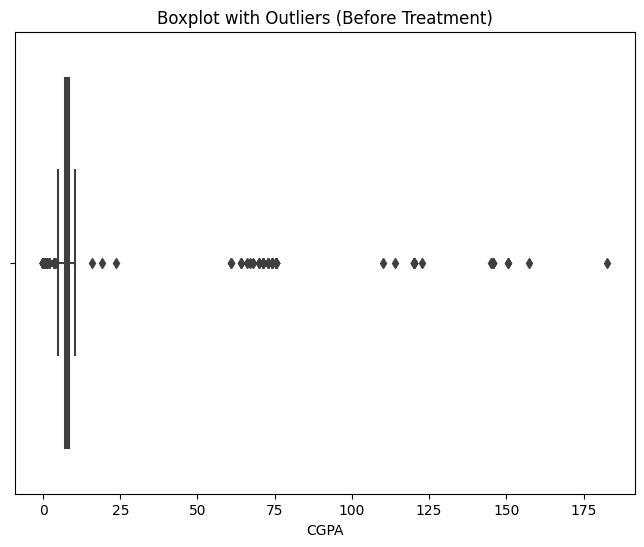

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


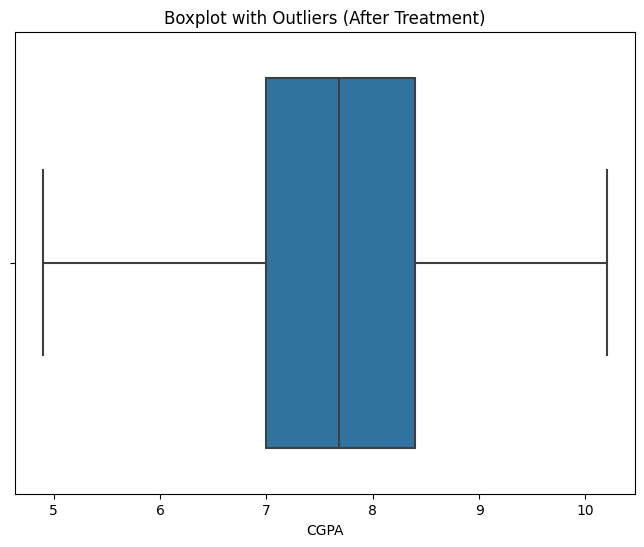

Original DataFrame:
                                University Name Program  Research Exp  \
0            New Jersey Institute of Technology      MS             0   
1             University of Southern California      MS             0   
2               Worcester Polytechnic Institute      MS             0   
3               Worcester Polytechnic Institute      MS             0   
4                      Arizona State University      MS             0   
...                                         ...     ...           ...   
51319  Texas A and M University College Station      MS             0   
51320                University of Pennsylvania      MS             0   
51321         University of Southern California      MS             0   
51322         University of Southern California      MS             0   
51323                University of Texas Austin      MS             0   

       TOEFL Score   greV   greQ  greA  Topper CGPA   CGPA  Admission  \
0       101.000000  430.0  740

In [31]:
def replace_outliers_iqr(df, column, replacement='mean', threshold=1.5):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR    
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    # Replace outliers with mean or median
    if replacement == 'mean':   
        replacement_value = df[column].mean()
    elif replacement == 'median':  
        replacement_value = df[column].median()
    else:       
        raise ValueError("Invalid replacement method. Use 'mean' or 'median'.")
    
    df.loc[outliers, column] = replacement_value
    return df
# Replace outliers in the 'Value' column with the 

# Plot outliers before treatment 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['CGPA']) 
plt.title('Boxplot with Outliers (Before Treatment)') 
plt.show()

df_replaced_outliers = replace_outliers_iqr(df, 'CGPA', replacement='mean')
# Print the original and modified DataFrames
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df_replaced_outliers['CGPA']) 
plt.title('Boxplot with Outliers (After Treatment)') 
plt.show()

print("Original DataFrame:")
print(df)
print("\nDataFrame with replaced outliers (mean):")
print(df_replaced_outliers)

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


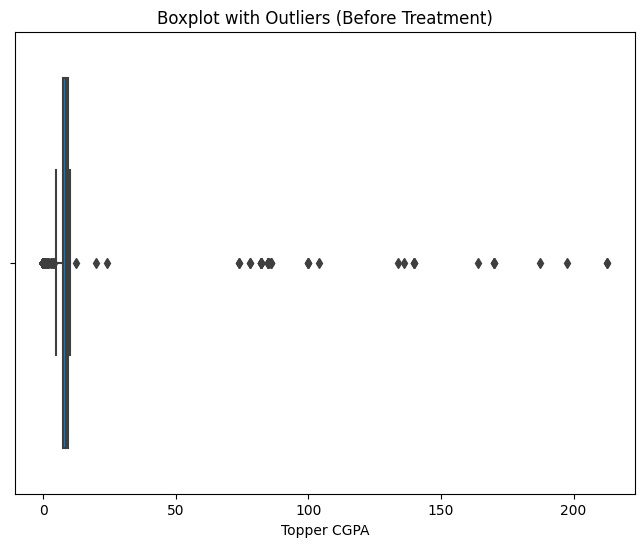

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


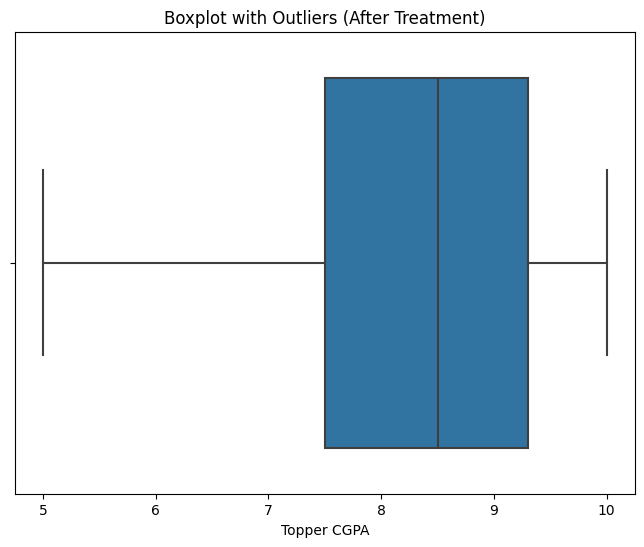

Original DataFrame:
                                University Name Program  Research Exp  \
0            New Jersey Institute of Technology      MS             0   
1             University of Southern California      MS             0   
2               Worcester Polytechnic Institute      MS             0   
3               Worcester Polytechnic Institute      MS             0   
4                      Arizona State University      MS             0   
...                                         ...     ...           ...   
51319  Texas A and M University College Station      MS             0   
51320                University of Pennsylvania      MS             0   
51321         University of Southern California      MS             0   
51322         University of Southern California      MS             0   
51323                University of Texas Austin      MS             0   

       TOEFL Score   greV   greQ  greA  Topper CGPA   CGPA  Admission  \
0       101.000000  430.0  740

In [32]:
def replace_outliers_iqr(df, column, replacement='mean', threshold=1.5):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR    
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    # Replace outliers with mean or median
    if replacement == 'mean':   
        replacement_value = df[column].mean()
    elif replacement == 'median':  
        replacement_value = df[column].median()
    else:       
        raise ValueError("Invalid replacement method. Use 'mean' or 'median'.")
    
    df.loc[outliers, column] = replacement_value
    return df
# Replace outliers in the 'Value' column with the 

# Plot outliers before treatment 
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['Topper CGPA']) 
plt.title('Boxplot with Outliers (Before Treatment)') 
plt.show()

df_replaced_outliers = replace_outliers_iqr(df, 'Topper CGPA', replacement='mean')
# Print the original and modified DataFrames
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df_replaced_outliers['Topper CGPA']) 
plt.title('Boxplot with Outliers (After Treatment)') 
plt.show()

print("Original DataFrame:")
print(df)
print("\nDataFrame with replaced outliers (mean):")
print(df_replaced_outliers)

In [33]:
df.shape

(51304, 11)

In [34]:
def func0(program):
    if program.upper() == 'MS':
        return 0
    elif program.upper() == 'PHD':
        return 1
    else:
        return 2
df['Program'] = df['Program'].apply(func0)
df

,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label
0,New Jersey Institute of Technology,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0
1,University of Southern California,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0
2,Worcester Polytechnic Institute,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0
3,Worcester Polytechnic Institute,0,0,91.000000,144.0,157.0,3.0,7.300000,5.611,0,0
4,Arizona State University,0,0,109.555966,149.0,157.0,3.0,8.500000,7.710,1,1
...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,0,1401
51320,University of Pennsylvania,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401
51321,University of Southern California,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,1,1401
51322,University of Southern California,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401


In [35]:
univ=['Carnegie Mellon University',
       'University of North Carolina Chapel Hill',
       'University of Illinois Urbana-Champaign',
       'University of California San Diego',
       'University of Minnesota Twin Cities',
       'Texas A and M University College Station',
       'Georgia Institute of Technology', 'University of Texas Austin',
       'University of Michigan Ann Arbor', 'Columbia University',
       'University of Maryland College Park', 'Arizona State University',
       'University of Cincinnati', 'Ohio State University Columbus',
       'North Carolina State University', 'Northeastern University',
       'University of Arizona', 'University of Wisconsin Madison',
       'SUNY Buffalo', 'Clemson University', 'University of Utah',
       'Rutgers University New Brunswick/Piscataway',
       'Virginia Polytechnic Institute and State University',
       'Stanford University', 'Massachusetts Institute of Technology',
       'California Institute of Technology',
       'University of Massachusetts Amherst',
       'University of California Irvine', 'Purdue University',
       'Cornell University', 'University of Florida',
       'University of Washington', 'Syracuse University',
       'University of Pennsylvania', 'University of Southern California',
       'University of Texas Dallas', 'University of Illinois Chicago',
       'George Mason University', 'Harvard University',
       'Johns Hopkins University', 'SUNY Stony Brook',
       'Northwestern University', 'New York University',
       'New Jersey Institute of Technology',
       'University of California Santa Barbara', 'Princeton University',
       'University of Colorado Boulder',
       'University of California Los Angeles',
       'University of North Carolina Charlotte',
       'University of Texas Arlington', 'University of California Davis',
       'Worcester Polytechnic Institute',
       'University of California Santa Cruz', 'Wayne State University']
ranks = [48,90,75,45,156,189,72,65,21,18,136,215,561,101,285,344,262,56,340,701,353,262,327,2,1,5,305,219,111,14,167,68,581,15,129,501,231,801,3,24,359,31,39,751,135,13,206,35,90,301,104,601,367,484]
print(len(univ), len(ranks))
univdict = {univ[i]: ranks[i] for i in range(len(univ))} 
print(univdict)

54 54
{'Carnegie Mellon University': 48, 'University of North Carolina Chapel Hill': 90, 'University of Illinois Urbana-Champaign': 75, 'University of California San Diego': 45, 'University of Minnesota Twin Cities': 156, 'Texas A and M University College Station': 189, 'Georgia Institute of Technology': 72, 'University of Texas Austin': 65, 'University of Michigan Ann Arbor': 21, 'Columbia University': 18, 'University of Maryland College Park': 136, 'Arizona State University': 215, 'University of Cincinnati': 561, 'Ohio State University Columbus': 101, 'North Carolina State University': 285, 'Northeastern University': 344, 'University of Arizona': 262, 'University of Wisconsin Madison': 56, 'SUNY Buffalo': 340, 'Clemson University': 701, 'University of Utah': 353, 'Rutgers University New Brunswick/Piscataway': 262, 'Virginia Polytechnic Institute and State University': 327, 'Stanford University': 2, 'Massachusetts Institute of Technology': 1, 'California Institute of Technology': 5, '

In [36]:
ranking = []
# uniqueUnivs = list(df['University Name'].unique())
# print((uniqueUnivs))
for index, row in df.iterrows():
    # i = uniqueUnivs.index(row['University Name'])
    # print(row['University Name'])
    ranking.append(univdict[row['University Name']])
print(len(ranking), len(ranks))
df['ranking'] = ranking
df

51304 54


,University Name,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,New Jersey Institute of Technology,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,751
1,University of Southern California,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,129
2,Worcester Polytechnic Institute,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,601
3,Worcester Polytechnic Institute,0,0,91.000000,144.0,157.0,3.0,7.300000,5.611,0,0,601
4,Arizona State University,0,0,109.555966,149.0,157.0,3.0,8.500000,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...,...
51319,Texas A and M University College Station,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,0,1401,189
51320,University of Pennsylvania,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401,15
51321,University of Southern California,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,1,1401,129
51322,University of Southern California,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401,129


In [37]:
df = df.drop(columns='University Name')
df

,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,751
1,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,129
2,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,601
3,0,0,91.000000,144.0,157.0,3.0,7.300000,5.611,0,0,601
4,0,0,109.555966,149.0,157.0,3.0,8.500000,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...
51319,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,0,1401,189
51320,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401,15
51321,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,1,1401,129
51322,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401,129


In [38]:
df.reset_index(inplace=True)
df = df.drop(columns=['index'])
df

,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,751
1,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,129
2,0,0,101.000000,430.0,740.0,4.5,7.227000,7.227,1,0,601
3,0,0,91.000000,144.0,157.0,3.0,7.300000,5.611,0,0,601
4,0,0,109.555966,149.0,157.0,3.0,8.500000,7.710,1,1,215
...,...,...,...,...,...,...,...,...,...,...,...
51299,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,0,1401,189
51300,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401,15
51301,0,0,102.000000,680.0,800.0,3.0,9.275000,9.200,1,1401,129
51302,0,0,112.000000,154.0,169.0,3.0,7.087338,8.700,1,1401,129


(51304, 11)


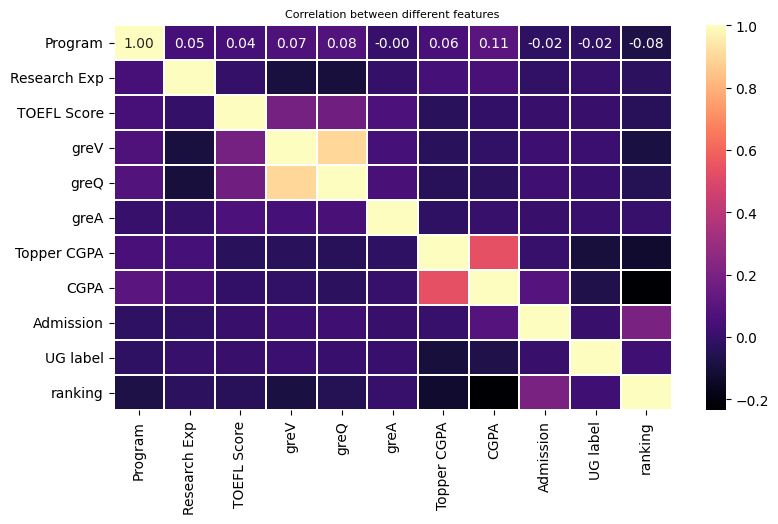

In [39]:
print(df.shape)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Correlation between different features', fontsize=8)
ax.title.set_position([0.5, 1.05])
# ax.axis('off')
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f',cmap="magma")
plt.show()


In [40]:
df.columns

Index(['Program', 'Research Exp', 'TOEFL Score', 'greV', 'greQ', 'greA',
       'Topper CGPA', 'CGPA', 'Admission', 'UG label', 'ranking'],
      dtype='object')

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'columns_to_normalize' is a list of columns you want to normalize
columns_to_normalize = ['TOEFL Score', 'greV', 'greQ', 'greA', 'Topper CGPA', 'CGPA', 'ranking']

# Select the columns and reshape for MinMaxScaler
columns_data = df[columns_to_normalize].values.reshape(-1, len(columns_to_normalize))

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_columns = scaler.fit_transform(columns_data)

# If needed, replace the original columns in your DataFrame with the normalized values
df[columns_to_normalize] = normalized_columns


In [42]:
df

,Program,Research Exp,TOEFL Score,greV,greQ,greA,Topper CGPA,CGPA,Admission,UG label,ranking
0,0,0,0.074815,0.077338,0.092616,0.003061,0.445400,0.439057,1,0,0.9375
1,0,0,0.074815,0.077338,0.092616,0.003061,0.445400,0.439057,1,0,0.1600
2,0,0,0.074815,0.077338,0.092616,0.003061,0.445400,0.439057,1,0,0.7500
3,0,0,0.067407,0.025899,0.019650,0.002041,0.460000,0.134151,0,0,0.7500
4,0,0,0.081153,0.026799,0.019650,0.002041,0.700000,0.530189,1,1,0.2675
...,...,...,...,...,...,...,...,...,...,...,...
51299,0,0,0.075556,0.122302,0.100125,0.002041,0.855000,0.811321,0,1401,0.2350
51300,0,0,0.082963,0.027698,0.021151,0.002041,0.417468,0.716981,1,1401,0.0175
51301,0,0,0.075556,0.122302,0.100125,0.002041,0.855000,0.811321,1,1401,0.1600
51302,0,0,0.082963,0.027698,0.021151,0.002041,0.417468,0.716981,1,1401,0.1600


In [43]:
nan_count_per_column = df.isna().sum()
nan_count_per_column

Program            0
Research Exp       0
TOEFL Score        0
greV               0
greQ               0
greA               0
Topper CGPA     1085
CGPA            1085
Admission          0
UG label           0
ranking            0
dtype: int64

In [44]:
df = df[df["CGPA"].notnull()]
nan_count_per_column = df.isna().sum()
nan_count_per_column

Program         0
Research Exp    0
TOEFL Score     0
greV            0
greQ            0
greA            0
Topper CGPA     0
CGPA            0
Admission       0
UG label        0
ranking         0
dtype: int64

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# df = pd.read_csv('your_dataset.csv')

# Assuming 'Admission' is the target variable
# Extract features and target variable
# X = df.drop(columns=['Admission'])
# y = df['Admission']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=9 the best
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.5743727598566308
Confusion Matrix:
 [[2852 2132]
 [2143 2917]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57      4984
           1       0.58      0.58      0.58      5060

    accuracy                           0.57     10044
   macro avg       0.57      0.57      0.57     10044
weighted avg       0.57      0.57      0.57     10044



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Perform k-fold cross-validation
k_fold = 5  # Set the number of folds
accuracy_scores = cross_val_score(rf_classifier, X_train, y_train, cv=k_fold)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", accuracy_scores)

# Calculate and print the mean accuracy across all folds
mean_accuracy = accuracy_scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Accuracy scores for each fold: [0.66932172 0.66919726 0.67641568 0.67118855 0.67268202]
Mean Accuracy: 0.6717610454262601


In [47]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6290322580645161

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
# df = pd.read_csv('your_dataset.csv')

# Assuming 'Admission' is the target variable
# Extract features and target variable
X = df.drop(columns=['Admission'])
y = df['Admission']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

# Use the best value for k
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Handling Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the classifier on the resampled training set
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_scaled = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_scaled)
classification_rep = classification_report(y_test, y_pred_scaled)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Best value for k: 11
Accuracy: 0.5977698128235762
Confusion Matrix:
 [[3065 1919]
 [2121 2939]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60      4984
           1       0.60      0.58      0.59      5060

    accuracy                           0.60     10044
   macro avg       0.60      0.60      0.60     10044
weighted avg       0.60      0.60      0.60     10044



In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Extract features and target variable
X = df.drop(columns=['Admission'])
y = df['Admission']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the SVM classifier
svm_classifier = SVC(C=1, kernel='rbf', gamma='scale', class_weight='balanced')  # Adjust hyperparameters based on tuning

# Train the classifier on the training set
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6138988450816408
Confusion Matrix:
 [[3419 1565]
 [2313 2747]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.69      0.64      4984
           1       0.64      0.54      0.59      5060

    accuracy                           0.61     10044
   macro avg       0.62      0.61      0.61     10044
weighted avg       0.62      0.61      0.61     10044



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Predict using the test data
predictions = rf_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6719434488251692
